In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_csv("datasets/pupil-enrollment-2010-2015.csv")

In [25]:
# Enrollment Trends Analysis
# The primary objective of this study is to analyze and predict total girls enrollment  over time per district. The focus is on understanding how enrollment numbers have changed annually and using this information to build a predictive model for future enrollments.
# Problem Statement: In recent years, understanding and anticipating fluctuations in girls enrollment have become crucial for educational planning. The lack of accurate predictions can lead to resource misallocation and infrastructure challenges. Therefore, the problem at hand is to develop a reliable model that can analyze historical enrollment data and forecast future trends. This model should take into account temporal patterns, allowing educational institutions to proactively adjust their strategies based on anticipated changes in student enrollment.
# Target Variable: Enrollment, represents the total number of students enrolled in a given educational institution or district for a specific academic year. The goal is to predict this variable based on historical enrollment data and other relevant features.

In [26]:
# Get the number of features/variables
num_features = df.shape[1]

# Print the number of features/variables
print("Number of features/variables:", num_features)

Number of features/variables: 22


In [27]:
# Explore data:
print(df.head())
print(df.info())

   Year  District ID Name of district    Title of respondent Type of school  \
0  2010          105           Masaka            HEADTEACHER            Day   
1  2010          105           Masaka        KIWEESA ANTHONY            Day   
2  2010          105           Masaka                TEACHER            Day   
3  2010          105           Masaka  SENIOR EDUC.ASSISTANT            Day   
4  2010          105           Masaka     Deputy headteacher           Both   

   Total P1 Boys Enrollment  Total P1 Girls Enrollment  \
0                      58.0                       60.0   
1                      26.0                       30.0   
2                      65.0                       55.0   
3                      62.0                       76.0   
4                     125.0                      116.0   

   Total P2 Boys Enrollment  Total P2 Girls Enrollment  \
0                      42.0                       51.0   
1                      45.0                       36.0   
2 

In [28]:
# Check for missing values
print(df.isnull().sum())
# Handle missing values
df = df.dropna()
print(df.head(5))
print(df.tail(5))

Year                           0
District ID                    0
Name of district               0
Title of respondent          348
Type of school               171
Total P1 Boys Enrollment      20
Total P1 Girls Enrollment     11
Total P2 Boys Enrollment      14
Total P2 Girls Enrollment     12
Total P3 Boys Enrollment      15
Total P3 Girls Enrollment     10
Total P4 Boys Enrollment      14
Total P4 Girls Enrollment     10
Total P5 Boys Enrollment      19
Total P5 Girls Enrollment     17
Total P6 Boys Enrollment      42
Total P6 Girls Enrollment     38
Total P7 Boys Enrollment      89
Total P7 Girls Enrollment     90
Total Boys Enrollment          4
Total Girls Enrollment         3
Total Enrollment               3
dtype: int64
   Year  District ID Name of district    Title of respondent Type of school  \
0  2010          105           Masaka            HEADTEACHER            Day   
1  2010          105           Masaka        KIWEESA ANTHONY            Day   
2  2010          105    

In [30]:
# Determine correlation.
# Create a mapping for label encoding
#type_of_school_mapping = {'day': 1, 'boarding': 2, 'both': 3,'Government':4,'Private':5,'Community':6}
# Add a new column with numerical values
#df['Type of School Numerical'] = df['Type of School'].map(type_of_school_mapping)

# Specify the columns you're interested in
columns_of_interest = ['Year', 'District ID', 'Total Boys Enrollment', 'Total Girls Enrollment', 'Total Enrollment']
# Create a subset DataFrame with only the columns of interest
subset_df = df[columns_of_interest]
# Calculate the correlation matrix for the subset
correlation_matrix_subset = subset_df.corr()
print(correlation_matrix_subset)
# Positive Correlation (1): A change in one variable is accompanied by a change in another in the same direction.
# Negative Correlation (-1): A change in one variable is accompanied by a change in another in the opposite direction.
# No Correlation (0): There is no linear correlation between the variables.


                            Year  District ID  Total Boys Enrollment  \
Year                    1.000000    -0.005751              -0.054472   
District ID            -0.005751     1.000000               0.026843   
Total Boys Enrollment  -0.054472     0.026843               1.000000   
Total Girls Enrollment -0.056229    -0.004195               0.901831   
Total Enrollment       -0.058631     0.013406               0.965122   

                        Total Girls Enrollment  Total Enrollment  
Year                                 -0.056229         -0.058631  
District ID                          -0.004195          0.013406  
Total Boys Enrollment                 0.901831          0.965122  
Total Girls Enrollment                1.000000          0.965937  
Total Enrollment                      0.965937          1.000000  


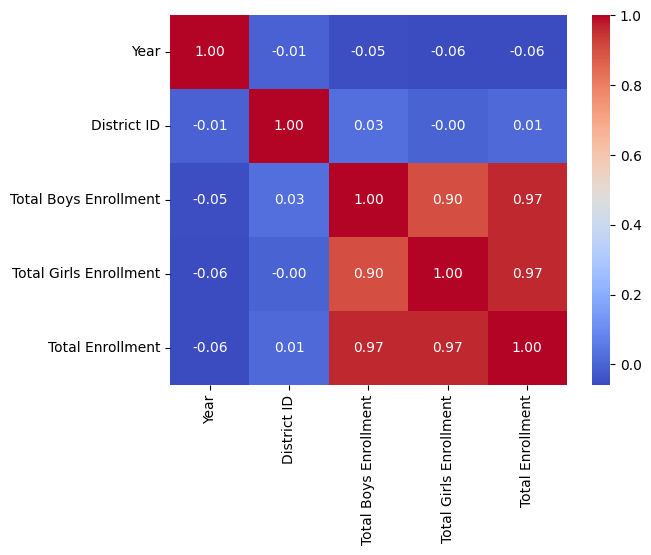

In [31]:
# Visualize correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

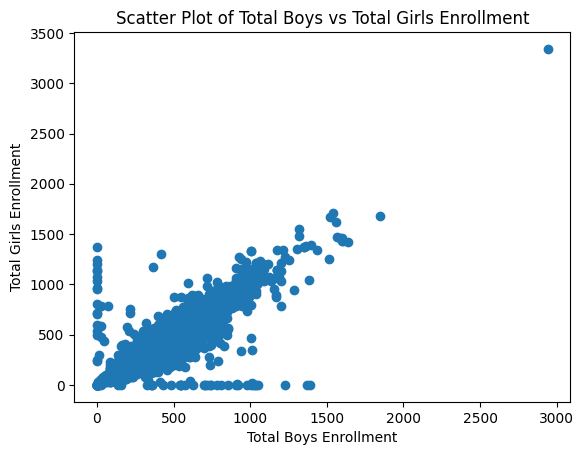

In [32]:
# Relationship between Total boys enrollment  and Total Girls Enrollment.
plt.scatter(df['Total Boys Enrollment'], df['Total Girls Enrollment'])
plt.xlabel('Total Boys Enrollment')
plt.ylabel('Total Girls Enrollment')
plt.title('Scatter Plot of Total Boys vs Total Girls Enrollment')
plt.show()

In [48]:
# feature selection.
features = df[['District ID','Total Girls Enrollment']]


In [49]:
# feature scaling
from sklearn.preprocessing import StandardScaler
X = df[['District ID', 'Total Girls Enrollment']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)


[[-1.48309327  0.28730106]
 [-1.48309327 -0.41954808]
 [-1.48309327 -0.02454415]
 ...
 [ 1.49371506 -0.77297264]
 [ 1.49371506 -1.26672755]
 [ 1.49371506 -0.5027068 ]]


In [50]:
# perform train_test split
from sklearn.model_selection import train_test_split
X = df[['District ID', 'Total Girls Enrollment']]
y = df['Total Girls Enrollment']

# Set the test_size parameter to control the proportion of the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
# train linear regression model.
from sklearn.linear_model import LinearRegression
model = LinearRegression(); model.fit(X_train, y_train)

LinearRegression()

In [52]:
# evaluate model
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
predictions = model.predict(X_test)
print(predictions)
# Evaluate model performance
print(f'Mean Squared Error: {mean_squared_error(y_test, predictions)}')
print(f'R-squared: {r2_score(y_test, predictions)}')

[626. 499. 199. ... 237. 116. 269.]
Mean Squared Error: 2.860393408517655e-27
R-squared: 1.0


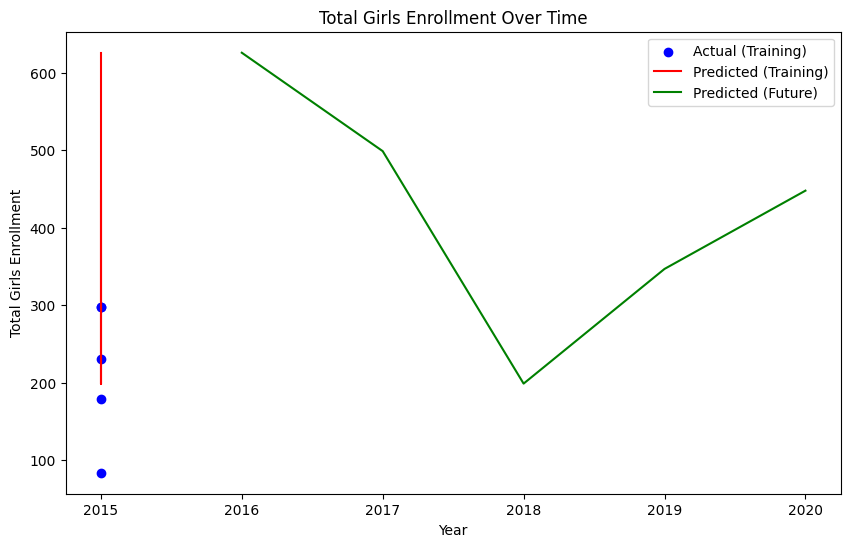

In [61]:
# plotting the predictions
import numpy as np
future_years = np.array([2016, 2017, 2018, 2019, 2020])
predicted_values = predictions[:5]
training_years = df['Year'].tail(5)
actual_girls_enrollment = df['Total Girls Enrollment'].tail(5)
# Plotting
plt.figure(figsize=(10, 6))

# Plotting actual values from the training data
plt.scatter(training_years, actual_girls_enrollment, color='blue', label='Actual (Training)')

# Plotting predicted values for the training years
plt.plot(training_years, predicted_values, color='red', label='Predicted (Training)')

# Plotting predicted values for the future years
plt.plot(future_years, predicted_values, color='green', label='Predicted (Future)')

plt.title('Total Girls Enrollment Over Time')
plt.xlabel('Year')
plt.ylabel('Total Girls Enrollment')
plt.legend()
plt.show()